In [62]:
import pandas as pd
import numpy as np

In [63]:
def na_imputation(series: pd.Series) -> pd.Series:
    """
    Replace NA values with 0.8 * min of the series (excluding NA).
    Equivalent to the na_imputation() function in R.
    """
    min_val = series.min(skipna=True)
    series_filled = series.fillna(min_val * 0.8)
    return series_filled

In [64]:
# ----------------------------------------------------------------------
# 1. Read data
# ----------------------------------------------------------------------
dat = pd.read_csv('data/ProteinMatrix_sampleID_MapEC50_20240229.csv', index_col=0)

/tmp/ipykernel_11253/2703600708.py:4: DtypeWarning: Columns (0,5587,5588,5589,5590,5591,5592,5593,5596,5599,5600,5601,5603,5604,5606,5614) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('data/ProteinMatrix_sampleID_MapEC50_20240229.csv', index_col=0)


In [65]:
dat.shape

(15002, 5616)

In [66]:
dat.describe()

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,Anchor_dose,BioRep,Anchor.Conc,Combo.IC50,EC50,Library.Emax,Bliss.Emax,Combo.Emax,Delta.Xmid,Delta.Emax
count,4996.000000,3222.000000,10491.000000,3741.000000,1.455300e+04,5664.000000,3962.000000,2360.000000,2122.00000,1.355500e+04,...,4721.000000,15002.000000,4504.000000,4513.000000,9247.000000,4513.000000,4513.000000,4513.000000,4513.000000,4504.000000
mean,1118.588424,13351.036862,1849.689544,1021.528857,1.246911e+04,1381.609557,1153.797774,617.659409,648.65159,9.059588e+03,...,4.213818,2.306759,1.921994,11.147487,74.767622,0.617745,0.542388,0.574224,-0.467053,-0.023209
std,582.828276,5973.794412,1080.075213,454.855402,2.628785e+04,614.450956,728.280384,821.810751,371.50948,2.100608e+04,...,7.203862,1.435183,2.347662,3.368156,173.429855,0.246185,0.235177,0.238545,2.172040,0.127101
min,11.710300,176.757000,68.707200,86.684000,5.396670e+02,52.328500,24.259500,44.925400,25.21790,5.350080e+02,...,0.000000,1.000000,0.000250,-1.958610,0.015439,0.002892,0.001377,0.001852,-9.274410,-0.733537
25%,709.249250,9587.340000,1073.735000,698.069000,9.842750e+03,969.951000,755.546000,332.604500,367.99550,5.557585e+03,...,0.100000,1.000000,0.500000,8.770930,5.602588,0.422273,0.370103,0.384653,-1.222430,-0.062574
50%,1072.225000,12562.050000,1648.430000,953.820000,1.191550e+04,1306.650000,1065.635000,492.387500,581.73350,7.271590e+03,...,2.000000,2.000000,1.000000,10.929000,17.359510,0.594500,0.531494,0.596075,-0.185974,-0.009008
75%,1437.647500,16479.300000,2485.010000,1273.560000,1.421200e+04,1669.985000,1426.972500,729.392250,870.10400,9.543580e+03,...,4.000000,3.000000,2.500000,13.946200,69.823265,0.872484,0.764402,0.797490,0.477827,0.025247
max,6414.090000,64541.900000,39161.400000,4507.840000,2.201910e+06,6698.110000,23486.200000,25668.700000,2491.85000,2.355840e+06,...,30.000000,18.000000,7.500000,18.081400,3825.835269,0.960079,0.932757,0.941377,9.311160,0.493566


In [67]:
dat.head(5)

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,Combo.IC50,EC50,Library.Emax,Bliss.Emax,Combo.Emax,Delta.Xmid,Delta.Emax,Synergy,machine,NY_label
Sample_ID,,,,,,,,,,,,,,,,,,,,,
B1422,NaN,NaN,NaN,NaN,4614.75,NaN,527.226,NaN,NaN,7426.15,...,NaN,10.955999,NaN,NaN,NaN,NaN,NaN,NaN,D,Y
B5718,NaN,NaN,2008.570,NaN,5740.72,NaN,NaN,NaN,NaN,8802.92,...,NaN,85.011714,NaN,NaN,NaN,NaN,NaN,NaN,WAF,N
B3832,NaN,NaN,877.276,NaN,5924.43,NaN,NaN,NaN,NaN,6034.68,...,NaN,10.955999,NaN,NaN,NaN,NaN,NaN,NaN,D,Y
B3637,NaN,NaN,312.174,NaN,5228.96,NaN,NaN,NaN,NaN,8712.97,...,NaN,10.955999,NaN,NaN,NaN,NaN,NaN,NaN,D,Y
B532,NaN,NaN,NaN,NaN,4851.38,NaN,NaN,NaN,NaN,11492.50,...,NaN,10.955999,NaN,NaN,NaN,NaN,NaN,NaN,WAE,Y


In [68]:
dat["Anchor_iname"].value_counts(dropna=False)

Anchor_iname
NaN               10432
Vorinostat          655
Cisplatin           649
Gemcitabine         646
5-Fluorouracil      627
Docetaxel           537
Lapatinib           501
Temozolomide        499
Olaparib            456
Name: count, dtype: int64

In [69]:
dat["Library_iname"].value_counts(dropna=False)

Library_iname
NaN             10432
Cisplatin         562
Afatinib          549
Paclitaxel        541
Lapatinib         490
Docetaxel         466
Sorafenib         464
Alpelisib         419
Olaparib          399
Temozolomide      344
Gemcitabine       336
Name: count, dtype: int64

In [70]:
dat["type2"].value_counts(dropna=False)

type2
NaN                   10161
MCF7_#32 #47             36
MDA-MB-436_#20 #64       36
HCC1187_#53 #64          27
BT549_#64 #32            27
                      ...  
HCC1937_#20 #53           2
HCC1937_#47 #53           1
HCC1937_#33 #53           1
HCC1937_#56 #32           1
HCC1937_#69 #53           1
Name: count, Length: 443, dtype: int64

In [71]:
dat["Anchor.Name"].value_counts(dropna=False)

Anchor.Name
NaN    10489
#64      649
#56      646
#33      631
#69      627
#53      537
#47      493
#32      486
#20      444
Name: count, dtype: int64

In [72]:
len(dat["drugIdAB"].unique())

61

In [73]:
dat["Cell.Line.name"].value_counts(dropna=False)

Cell.Line.name
NaN           10489
BT20            350
HCC1806         327
HCC1143         323
MCF7            322
BT549           306
MDA-MB-231      306
MDA-MB-453      304
T47D            297
MDA-MB-436      279
HCC1937         262
HS578T          260
HCC1187         249
HCC70           246
MDA-MB-468      243
HCC1395         232
HCC38           207
Name: count, dtype: int64

In [74]:
dat["BioRep"].value_counts(dropna=False)

BioRep
3.0     4731
1.0     4604
2.0     4456
4.0      392
5.0      323
6.0      309
7.0       41
8.0       38
9.0       37
10.0      12
11.0      12
12.0      12
13.0       6
14.0       6
15.0       6
16.0       6
17.0       6
18.0       5
Name: count, dtype: int64

In [75]:
dat["cult_time"].value_counts(dropna=False)

cult_time
NaN     10161
24.0     1648
48.0     1606
6.0      1587
Name: count, dtype: int64

In [76]:
dat.columns[-30:]

Index(['Anchor_id', 'Library_iname', 'NY', 'pert_iname', 'pert_id',
       'Anchor_iname', 'Library_id', 'cult_time', 'pert_time', 'type',
       'protein_plate', 'Anchor_dose', 'drugNameAB', 'drugIdAB', 'type2',
       'BioRep', 'Cell.Line.name', 'Anchor.Name', 'Anchor.Conc',
       'Library.Name', 'Combo.IC50', 'EC50', 'Library.Emax', 'Bliss.Emax',
       'Combo.Emax', 'Delta.Xmid', 'Delta.Emax', 'Synergy', 'machine',
       'NY_label'],
      dtype='object')

Anchor_id
    Meaning: An identifier (e.g., numeric or alphanumeric) for the “anchor” drug in a drug-combination experiment.
    Context: In combination screens, one drug is often the “anchor” and tested in combination with many other “library” drugs.

Anchor_iname
    Meaning: The textual or short name for the anchor drug, e.g., a common name or abbreviation.
    Context: Pairs with Anchor_id to describe the drug itself.

Anchor.Name (similar usage) and Anchor.Conc
    Meaning: A descriptive name for the anchor drug, and its concentration (dose) used.
    Context: In some datasets, you’ll see “Anchor_iname” (internal name) vs “Anchor.Name” (more descriptive or standardized).

Anchor_dose
    Meaning: The specific dose at which the anchor drug was applied in a given experiment or well.

Library_id
    Meaning: Unique identifier for a “library” drug in a combination screen.
    Context: This drug is tested in combination with the anchor drug.

Library_iname / Library.Name
    Meaning: The textual or short name of the library drug.

Library.Emax
    Meaning: The maximum effect (Emax) observed/estimated for the library drug alone.

cult_time
    Meaning: The duration (in hours or days) that cells were cultured before the drug(s) were applied.
    Context: Sometimes cells are grown for a certain time prior to perturbation to ensure they are in a specific phase or density.

pert_time
    Meaning: The duration (in hours or days) of the perturbation (drug treatment).
    Context: Important for time-course data and response measurements.

pert_iname / pert_id

    Meaning: Generic “perturbation” name or identifier; often corresponds to the name of a drug or combination being tested.
    Context: If a single drug is used, this might simply be the drug name; for combos, it might store a code or placeholder.

drugNameAB / drugIdAB

    Meaning: A combined name or identifier for a two-drug combination (e.g., “DrugA_DrugB”).
    Context: Helps track which two drugs are combined in a single well/experiment.

type / type2

    oDrug” controls. Sometimes there are multiple classification schemes (hence “type2”).

BioRep

    Meaning: Biological replicate number (e.g., replicate 1, 2, 3).
    Context: Indicates repeated independent experiments (different passages or days) as opposed to technical replicates.

Cell.Line.name

Meaning: The name of the cell line used in the experiment.

protein_plate

Meaning: Identifier for the plate on which protein measurements (e.g., proteomics assays) were conducted.
Context: Large screens run multiple plates; each has its own barcodes, controls, etc.

machine

Meaning: The specific instrument or machine used to measure the data (e.g., a particular mass spectrometer or plate reader).
Context: Could be relevant for batch effects or instrument-specific normalization.

NY / NY_label

Lastly, the "NY" represents the categorization of the cell line response to the drug as either effective or ineffective. (from their website)

EC50

Meaning: The half-maximal effective concentration for a single-drug perturbation (the concentration at which half of the maximum effect is observed).
Context: A common metric in dose–response studies.

Combo.IC50

Meaning: The analogous IC50 (or sometimes the half-maximal inhibitory concentration) for a combination of two drugs.

Bliss.Emax, Combo.Emax

Meaning:
    Bliss.Emax: The predicted or reference maximal effect under the Bliss independence model (used to evaluate synergy).
    Combo.Emax: The actual observed maximal effect from the drug combination.
Context: These columns allow synergy analysis by comparing predicted vs. observed effects.

Delta.Xmid, Delta.Emax, Synergy

Meaning:
    Delta.Xmid / Delta.Emax: Differences in curve parameters (e.g., midpoint of the dose–response curve or max effect) compared to single-drug or predicted combo.
    Synergy: A synergy score (there are multiple synergy models: Bliss, Loewe, ZIP, etc.). Higher synergy means the combo outperforms additive expectations.
Context: Helps quantify whether two drugs together have a greater or lesser effect than expected from single-drug data.

Putting It All Together

Anchor_* columns relate to the anchor drug in a drug-combination screen.
Library_* columns relate to the library drug in that screen.
pert_* columns relate to the general perturbation ID, name, or time.
EC50/IC50/Emax/Delta/Bliss columns are standard pharmacological metrics (dose–response and synergy).
type, Cell.Line.name, machine, BioRep, and NY/batch labeling columns all provide context about the experimental setup (which drug type, which cell line, replicate number, which machine, etc.).

In [77]:
dat.loc[:, "type2"].unique()[:100]

array([nan, 'HCC1187_#53 #64', 'HCC1187_#20 #32', 'HCC1187_#64 #58',
       'HCC1187_#64 #32', 'HCC1187_#56 #58', 'HCC1187_#53 #32',
       'HCC1187_#56 #53', 'HCC1187_#33 #47', 'HCC1187_#32 #47',
       'HCC1187_#47 #21', 'HCC1187_#33 #32', 'HCC1187_#20 #64',
       'HCC1187_no nan', 'HCC1187_#20 #8', 'HCC1187_#56 #21',
       'HCC1187_#69 #53', 'HCC1187_#20 #21', 'HCC1187_#33 #8',
       'HCC1187_#69 #58', 'HCC1187_#53 #21', 'MCF7_#33 #53',
       'MCF7_#47 #56', 'MCF7_#20 #32', 'MCF7_#47 #53', 'MCF7_#47 #64',
       'MCF7_#64 #32', 'MCF7_#53 #32', 'MCF7_#33 #56', 'MCF7_#64 #8',
       'MCF7_#33 #58', 'MCF7_#32 #47', 'MCF7_#32 #8', 'MCF7_#33 #64',
       'MCF7_no nan', 'MCF7_#20 #8', 'MCF7_#33 #21', 'MCF7_#56 #21',
       'MCF7_#69 #47', 'MCF7_#69 #53', 'MCF7_#20 #21', 'MCF7_#56 #37',
       'MCF7_#69 #8', 'MCF7_#53 #37', 'MCF7_#47 #37', 'MCF7_#32 #21',
       'MCF7_#56 #32', 'MCF7_#53 #8', 'MCF7_#69 #58',
       'MDA-MB-436_#20 #53', 'MDA-MB-436_#47 #56', 'MDA-MB-436_#53 #64',
     

In [78]:
p_idx_end = 5585

data_protein = dat.iloc[:, :p_idx_end].copy()

In [79]:
# ----------------------------------------------------------------------
# 3. Remove columns with only one unique value
# ----------------------------------------------------------------------
unique_counts = data_protein.nunique(dropna=False)
cols_to_remove = unique_counts[unique_counts == 1].index
data_protein.drop(columns=cols_to_remove, inplace=True)

In [80]:
# Keep only columns with "HUMAN" in their name (as in R code)
data_protein = data_protein.loc[:, data_protein.columns.str.contains("HUMAN")]

In [81]:
import matplotlib.pyplot as plt
# Find proportion of missing values in each column
# Calculate the proportion of NaNs for each column
na_proportion = data_protein.isna().mean()

# # Plot the proportions
# plt.figure(figsize=(10, 6))
# na_proportion.plot(kind='bar')
# plt.title('Proportion of NaNs per Column')
# plt.xlabel('Columns')
# plt.ylabel('Proportion of NaNs')
# plt.show()

In [83]:
na_proportion.describe()

count    5519.000000
mean        0.596161
std         0.341161
min         0.003600
25%         0.275697
50%         0.681376
75%         0.917044
max         0.999933
dtype: float64

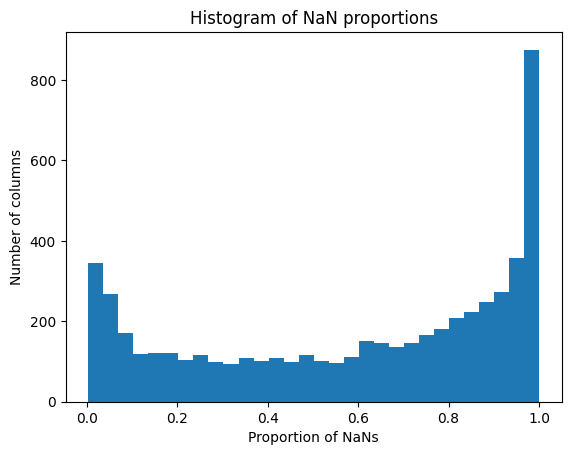

In [82]:
# make hist of nan proportions
plt.hist(na_proportion, bins=30)
plt.xlabel('Proportion of NaNs')
plt.ylabel('Number of columns')
plt.title('Histogram of NaN proportions')
plt.show()

In [84]:
# ----------------------------------------------------------------------
# 4. Impute missing values
# ----------------------------------------------------------------------
data_protein = data_protein.apply(na_imputation)

In [85]:
# ----------------------------------------------------------------------
# 5. Log transform
# ----------------------------------------------------------------------
data_protein = np.log(data_protein)

In [86]:
data_protein.describe()

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,O94905.O94905.ERLN2_HUMAN.ERLIN2.Erlin.2,P24752.P24752.THIL_HUMAN.ACAT1.Acetyl.CoA.acetyltransferase..mitochondrial,Q16831.Q16831.UPP1_HUMAN.UPP1.Uridine.phosphorylase.1,Q9NPD3.Q9NPD3.EXOS4_HUMAN.EXOSC4.Exosome.complex.component.RRP41,Q9UPN9.Q9UPN9.TRI33_HUMAN.TRIM33.E3.ubiquitin.protein.ligase.TRIM33,P48047.P48047.ATPO_HUMAN.ATP5PO.ATP.synthase.subunit.O..mitochondrial,Q9BQ95.Q9BQ95.ECSIT_HUMAN.ECSIT.Evolutionarily.conserved.signaling.intermediate.in.Toll.pathway..mitochondrial,Q9UI26.Q9UI26.IPO11_HUMAN.IPO11.Importin.11,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6,O43390.O43390.HNRPR_HUMAN.HNRNPR.Heterogeneous.nuclear.ribonucleoprotein.R
count,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,...,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000
mean,3.776700,5.904605,6.348667,4.884811,9.234952,5.017764,4.009189,3.992626,3.469508,8.666137,...,7.787215,8.453538,5.981783,6.037804,3.519843,9.767379,3.978257,3.399762,5.728074,9.938430
std,2.208171,1.837369,1.619339,1.144106,0.669128,1.671782,1.763553,0.983224,1.171320,0.983963,...,1.188478,1.298334,1.464305,1.706270,1.539579,0.739253,1.460610,1.098841,0.021930,0.542230
min,2.237325,4.951632,4.006710,4.239126,6.067809,3.734398,2.965665,3.581860,3.004411,6.059138,...,4.928482,4.074070,4.747794,3.861799,2.804247,5.990398,3.238365,3.019800,5.727718,6.708650
25%,2.237325,4.951632,4.006710,4.239126,9.167816,3.734398,2.965665,3.581860,3.004411,8.499557,...,7.770306,8.415060,4.747794,3.861799,2.804247,9.545993,3.238365,3.019800,5.727718,9.815173
50%,2.237325,4.951632,7.052024,4.239126,9.376503,3.734398,2.965665,3.581860,3.004411,8.844388,...,8.151973,8.771527,4.747794,6.993575,2.804247,9.928448,3.238365,3.019800,5.727718,10.005213
75%,6.561453,4.951632,7.625691,4.239126,9.555025,6.993559,6.012554,3.581860,3.004411,9.121589,...,8.454059,9.079414,7.600384,7.466177,2.804247,10.168898,3.238365,3.019800,5.727718,10.178529
max,8.766252,11.075070,10.575447,8.413573,14.604836,8.809581,10.064168,10.153028,7.820781,14.672408,...,15.340349,18.013013,10.390517,11.841596,8.720271,13.961721,9.483865,8.626672,7.437636,14.962732


In [87]:
# ----------------------------------------------------------------------
# 6. Prepare "drug" data, akin to dummy_cols(data.frame(drug = drugs))
# ----------------------------------------------------------------------
drugs = dat['pert_id'].astype(str)
# Convert to one-hot (pandas.get_dummies is similar to fastDummies in R)
data_drugs = pd.get_dummies(drugs, prefix='drug', dtype=float)

In [133]:
data_drugs.sum(axis=0)

drug_#10     151.0
drug_#11     151.0
drug_#12     151.0
drug_#13     151.0
drug_#14     149.0
             ...  
drug_#75     150.0
drug_#77     149.0
drug_#8      152.0
drug_#9      151.0
drug_nan    4841.0
Length: 64, dtype: float64

In [161]:
for col in ['drug_no', "drug_nan"]:
    if col in data_drugs.columns:
        data_drugs.drop(columns=col, inplace=True)

In [162]:
combination_idx = dat.index[dat['pert_id'].isna()].tolist()

In [163]:
for i in combination_idx:
    # 'drugIdAB' holds something like 'A B' for the two drugs
    drugAB = str(dat.loc[i, 'drugIdAB']).split()
    # Prepend 'drug_' to match the column naming
    drugAB_cols = [f"drug_{d}" for d in drugAB]
    
    anchor_dose = dat.loc[i, 'Anchor_dose']
    library_dose = dat.loc[i, 'Library_dose']
    
    # If the columns exist, set them accordingly
    if drugAB_cols[0] in data_drugs.columns:
        data_drugs.at[i, drugAB_cols[0]] = anchor_dose
    if drugAB_cols[1] in data_drugs.columns:
        data_drugs.at[i, drugAB_cols[1]] = library_dose

In [164]:
data_drugs

,drug_#10,drug_#11,drug_#12,drug_#13,drug_#14,drug_#17,drug_#18,drug_#2,drug_#20,drug_#21,...,drug_#7,drug_#70,drug_#71,drug_#72,drug_#73,drug_#74,drug_#75,drug_#77,drug_#8,drug_#9
Sample_ID,,,,,,,,,,,,,,,,,,,,,
B1422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B5718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B3832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B3637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
(data_drugs.loc[[i for i in data_drugs.index if str(i).startswith('D')],:]>0).sum(axis=1)

Sample_ID
D3423    2
D3360    2
D3457    2
D3361    2
D3265    2
        ..
D3568    2
D3487    2
D3547    2
D3466    2
D3628    2
Length: 4841, dtype: int64

In [ ]:
[i for i in data_drugs.index if i.startswith('drug_')]

In [167]:
data_additional = dat[['pert_time', 'protein_plate', 'machine', 'BioRep',
                        'Anchor_dose', 'Library_dose']].copy()
data_additional['Anchor_dose'] = data_additional['Anchor_dose'].fillna(0)
data_additional['Library_dose'] = data_additional['Library_dose'].fillna(0)
    

In [171]:
 # ----------------------------------------------------------------------
# 10. Response data: singleDrug uses 'EC50', combos use 'Combo.IC50'
# ----------------------------------------------------------------------
data_response = dat['EC50'].copy()
combo_ic50 = dat['Combo.IC50'].copy()
data_response.loc[combination_idx] = combo_ic50.loc[combination_idx]


In [180]:
data_response.loc[["D3423","B99", 99]]

Sample_ID
D3423    14.706500
B99      22.522808
99       11.896725
Name: EC50, dtype: float64

In [181]:
# Mark as 'drugCombination' for combos, 'singleDrug' otherwise, 'noDrug' if 'no'
type_col = pd.Series(['singleDrug'] * len(dat), index=dat.index)
type_col.loc[combination_idx] = 'drugCombination'
type_col.loc[drugs == 'no'] = 'noDrug'

pertLabel = dat['pert_id'].astype(str).copy()
# For combos, set label to drugIdAB
pertLabel.loc[combination_idx] = dat.loc[combination_idx, 'drugIdAB'].astype(str)

# If 'no no' or 'no' means no drug, we can handle that similarly:
# data_response[pertLabel == 'no'] = np.inf  # e.g. replicate R's assignment of Inf

In [184]:
# ----------------------------------------------------------------------
# 12. Combine everything
# ----------------------------------------------------------------------
data_final = pd.concat([data_protein.reset_index(drop=True),
                        data_drugs.reset_index(drop=True),
                        data_additional.reset_index(drop=True)], axis=1)
data_final['type'] = type_col.values
data_final['pertLabel'] = pertLabel.values
data_final['IC50'] = data_response.values
data_final['NY'] = dat['NY'].values  # If that column exists

In [192]:
data_final[data_final['type'] == 'singleDrug']

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,pert_time,protein_plate,machine,BioRep,Anchor_dose,Library_dose,type,pertLabel,IC50,NY
0,2.237325,4.951632,4.006710,4.239126,8.437013,3.734398,6.267629,3.581860,3.004411,8.912763,...,48,DU4475,D,1.0,0.0,0.0,singleDrug,#58,10.955999,Y
1,2.237325,4.951632,7.605178,4.239126,8.655340,3.734398,2.965665,3.581860,3.004411,9.082839,...,24,HCC1187,WAF,3.0,0.0,0.0,singleDrug,#25,85.011714,N
2,2.237325,4.951632,6.776822,4.239126,8.686840,3.734398,2.965665,3.581860,3.004411,8.705278,...,48,DU4475,D,2.0,0.0,0.0,singleDrug,#58,10.955999,Y
3,2.237325,4.951632,5.743561,4.239126,8.561968,3.734398,2.965665,3.581860,3.004411,9.072568,...,48,DU4475,D,3.0,0.0,0.0,singleDrug,#58,10.955999,Y
4,2.237325,4.951632,4.006710,4.239126,8.487018,3.734398,2.965665,3.581860,3.004411,9.349450,...,24,DU4475,WAE,1.0,0.0,0.0,singleDrug,#58,10.955999,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,6.552191,9.385327,8.240491,4.239126,9.613236,6.943653,2.965665,3.581860,3.004411,10.094215,...,24,HCC38,WAE,1.0,0.0,0.0,singleDrug,#64,11.896725,Y
14998,7.010276,4.951632,7.890691,7.007981,9.693223,3.734398,7.439254,3.581860,3.004411,9.874867,...,24,HCC38,WAE,2.0,0.0,0.0,singleDrug,#64,11.896725,Y
14999,6.925438,9.130818,8.080463,6.060799,9.606475,6.891964,7.088626,5.529350,3.004411,10.047670,...,6,HCC38,WAE,2.0,0.0,0.0,singleDrug,#64,11.896725,Y
15000,7.060150,9.669927,8.050171,4.239126,9.596045,6.821645,7.126240,5.316776,5.455445,10.150102,...,6,HCC38,WAE,1.0,0.0,0.0,singleDrug,#64,11.896725,Y


In [1]:
import pandas as pd
# ----------------------------------------------------------------------
# 1. Load data that was preprocessed previously
#    In R: load("data/prepData.RData")
#    In Python, we can load from a pickle or CSV. Adjust as needed:
# ----------------------------------------------------------------------
# data = pd.read_pickle('data/prepData.pkl')
# Or:
##############################################################################
data = pd.read_csv('data/preprocessed.csv', index_col="Sample_ID")  

##############################################################################
# 2) BASIC VARIABLES AND FILTERING
##############################################################################
n_protein = 5518

# Get data without control experiments
dat = data[(data['pertLabel'] != 'no no') & (data['pertLabel'] != 'no')]

    

/tmp/ipykernel_10407/2762058335.py:10: DtypeWarning: Columns (5585,5591) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/preprocessed.csv', index_col="Sample_ID")


In [2]:
data_ctr = data[(data['pertLabel'] == 'no no') | (data['pertLabel'] == 'no')]

In [3]:
data_ctr["type"].value_counts()

type
noDrug             499
drugCombination    146
Name: count, dtype: int64

In [4]:
data.iloc[:, :n_protein].isna().sum().sum()   

np.int64(0)

In [5]:
drop_cols = ['type', 'BioRep', 'machine', 'NY']
data_for_agg = data.drop(columns=[c for c in drop_cols if c in data.columns])

# Equivalent to dplyr::group_by(...) %>% summarise_all(median)
agg_data = (
    data_for_agg
    .groupby(['protein_plate','pertLabel','Anchor_dose','Library_dose','pert_time'], dropna=False)
    .median(numeric_only=True)
    .reset_index()
)

In [6]:
prot_names = data.columns[:n_protein]
n_pert_single = data.loc[data['type'] == 'singleDrug', 'pertLabel'].nunique()
pert_names = data.columns[n_protein : n_protein + n_pert_single]


In [7]:
baseline_prot = agg_data[agg_data['pertLabel'] == 'no'].copy()
agg_data = agg_data[agg_data['pertLabel'] != 'no no']
agg_data = agg_data[agg_data['pertLabel'] != 'no']


In [8]:
baseline_prot

,protein_plate,pertLabel,Anchor_dose,Library_dose,pert_time,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,...,drug_#70,drug_#71,drug_#72,drug_#73,drug_#74,drug_#75,drug_#77,drug_#8,drug_#9,IC50
300,BT20,no,0.0,0.0,0,6.921181,9.764131,7.489451,6.061563,9.673767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
494,DU4475,no,0.0,0.0,0,2.237325,4.951632,4.006710,4.239126,8.377414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
765,HCC1187,no,0.0,0.0,0,2.237325,4.951632,4.006710,4.239126,8.243469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1039,HCC1395,no,0.0,0.0,0,2.237325,4.951632,6.417994,5.494772,9.340578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1355,HCC1806,no,0.0,0.0,0,6.664698,9.196350,6.843442,6.156044,9.652673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1635,HCC70,no,0.0,0.0,0,6.560110,9.318656,7.463320,4.239126,9.468924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1909,HS578T,no,0.0,0.0,0,6.587371,4.951632,8.022628,4.239126,9.381803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2267,MCF7,no,0.0,0.0,0,2.237325,4.951632,4.006710,4.239126,9.005109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2550,MDA-MB-436,no,0.0,0.0,0,2.237325,4.951632,4.006710,4.239126,9.264724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2686,MDA-MB-453(ATCC),no,0.0,0.0,0,2.237325,4.951632,4.006710,4.239126,9.176778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
agg_data["pertLabel"].value_counts()

pertLabel
#32 #47    39
#64 #56    30
#53 #64    27
#12        24
#14        24
           ..
#53 #58     3
#32 #37     3
#20 #58     3
#47 #8      3
#33 #58     3
Name: count, Length: 122, dtype: int64

In [9]:
agg_data["protein_plate"].value_counts(dropna=False)

protein_plate
HCC1806       312
BT20          300
MCF7          297
MDA-MB-436    279
HCC1187       270
HS578T        270
HCC1395       270
DU4475        189
T47D           11
Name: count, dtype: int64

In [10]:
# Keep only plates that have baseline data
plates_with_baseline = baseline_prot['protein_plate'].unique()
agg_data = agg_data[agg_data['protein_plate'].isin(plates_with_baseline)]


In [11]:
# Add baseline to each perturbation
# R equivalent:
#   pert_info_names = c('protein_plate','pertLabel','Anchor_dose','Library_dose','IC50', pert_names)
#   baseline = agg_data[, pert_info_names]
pert_info_names = ['protein_plate','pertLabel','Anchor_dose','Library_dose','IC50'] + list(pert_names) + list(prot_names)
baseline = agg_data[pert_info_names].drop_duplicates().copy()
baseline['pert_time'] = 0
baseline.loc[:,prot_names] = 0

In [144]:
baseline

,protein_plate,pertLabel,Anchor_dose,Library_dose,IC50,drug_#10,drug_#11,drug_#12,drug_#13,drug_#14,...,O94905.O94905.ERLN2_HUMAN.ERLIN2.Erlin.2,P24752.P24752.THIL_HUMAN.ACAT1.Acetyl.CoA.acetyltransferase..mitochondrial,Q16831.Q16831.UPP1_HUMAN.UPP1.Uridine.phosphorylase.1,Q9NPD3.Q9NPD3.EXOS4_HUMAN.EXOSC4.Exosome.complex.component.RRP41,Q9UPN9.Q9UPN9.TRI33_HUMAN.TRIM33.E3.ubiquitin.protein.ligase.TRIM33,P48047.P48047.ATPO_HUMAN.ATP5PO.ATP.synthase.subunit.O..mitochondrial,Q9BQ95.Q9BQ95.ECSIT_HUMAN.ECSIT.Evolutionarily.conserved.signaling.intermediate.in.Toll.pathway..mitochondrial,Q9UI26.Q9UI26.IPO11_HUMAN.IPO11.Importin.11,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6,pert_time
0,BT20,#10,0.0,0.0,2.856550,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BT20,#10,0.0,0.0,2.856550,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,BT20,#10,0.0,0.0,2.856550,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,BT20,#11,0.0,0.0,2.303895,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,BT20,#11,0.0,0.0,2.303895,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,MDA-MB-436,#8,0.0,0.0,5.519594,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2209,MDA-MB-436,#8,0.0,0.0,5.519594,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2210,MDA-MB-436,#9,0.0,0.0,6.643996,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2211,MDA-MB-436,#9,0.0,0.0,6.643996,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [145]:
for i in range(len(baseline_prot)):
    row_i = baseline_prot.iloc[i]
    plate_val = row_i['protein_plate']
    mask = baseline['protein_plate'] == plate_val
    # Overwrite all protein columns with the baseline_prot row
    baseline.loc[mask, prot_names] = row_i[prot_names].values


In [146]:
agg_data = pd.concat([agg_data, baseline], ignore_index=True)


In [149]:
agg_data = agg_data.unstack(level='pert_time')

KeyError: 'Requested level (pert_time) does not match index name (None)'

In [147]:
# Pivot so that each pert_time becomes wide columns
# This mimics:
#   agg_data %>% pivot_wider(names_from = pert_time, values_from = all_of(prot_names))
index_cols = ['protein_plate','pertLabel','Anchor_dose','Library_dose','IC50','pert_time']
agg_data = agg_data.set_index(index_cols)
# We only want to pivot the protein columns:
agg_data = agg_data[prot_names]
#agg_data = agg_data.unstack(level='pert_time')  # creates multi-index columns
# Flatten multi-index: col = (protein, time)
agg_data.columns = [f"{col[0]}_{col[1]}" for col in agg_data.columns.to_flat_index()]
agg_data.reset_index(inplace=True)

In [148]:
agg_data

,protein_plate,pertLabel,Anchor_dose,Library_dose,IC50,pert_time,Q_8,Q_9,Q_9,P_1,...,Q_1,O_9,P_2,Q_1,Q_9,Q_9,P_4,Q_9,Q_9,O_7
0,BT20,#10,0.0,0.0,2.856550,6,7.034407,9.606143,7.586705,6.928300,...,10.109700,8.586577,9.031651,6.492345,6.603194,6.354549,9.771865,4.368006,3.019800,5.727718
1,BT20,#10,0.0,0.0,2.856550,24,7.247924,9.774444,7.564080,6.772387,...,10.137396,8.613744,9.064484,5.692820,6.439951,4.467204,9.884097,3.238365,4.673168,5.727718
2,BT20,#10,0.0,0.0,2.856550,48,6.908185,9.895609,7.639706,6.238549,...,10.199091,8.743733,9.151662,7.165377,7.183235,5.831803,10.117751,3.238365,4.434565,5.727718
3,BT20,#11,0.0,0.0,2.303895,6,7.388501,7.333436,7.513381,5.469308,...,10.047196,8.540668,8.927925,5.992937,6.814925,5.034681,9.899419,3.238365,3.019800,5.727718
4,BT20,#11,0.0,0.0,2.303895,24,4.848937,7.120221,7.302576,5.231441,...,10.112192,8.561192,9.069860,6.566493,7.054517,6.327130,9.931321,3.238365,3.019800,5.727718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,MDA-MB-436,#8,0.0,0.0,5.519594,0,2.237325,4.951632,4.006710,4.239126,...,9.919282,4.928482,8.730073,4.747794,3.861799,2.804247,9.051702,3.238365,3.019800,5.727718
4370,MDA-MB-436,#8,0.0,0.0,5.519594,0,2.237325,4.951632,4.006710,4.239126,...,9.919282,4.928482,8.730073,4.747794,3.861799,2.804247,9.051702,3.238365,3.019800,5.727718
4371,MDA-MB-436,#9,0.0,0.0,6.643996,0,2.237325,4.951632,4.006710,4.239126,...,9.919282,4.928482,8.730073,4.747794,3.861799,2.804247,9.051702,3.238365,3.019800,5.727718
4372,MDA-MB-436,#9,0.0,0.0,6.643996,0,2.237325,4.951632,4.006710,4.239126,...,9.919282,4.928482,8.730073,4.747794,3.861799,2.804247,9.051702,3.238365,3.019800,5.727718


In [18]:
n_proteins = 5518
protein_data = data.iloc[:,:n_proteins]

In [19]:
data["pertLabel"].value_counts()

pertLabel
no         321
#32 #47    112
no no      110
#20         98
#72         86
          ... 
#33 #58      9
#53 #58      9
#32 #37      9
#47 #8       9
#20 #58      7
Name: count, Length: 124, dtype: int64

In [35]:
data.drop(columns=['type', 'BioRep', 'machine', 'NY'], inplace=True)

In [38]:
group_cols = ['protein_plate', 'pertLabel', 'Anchor_dose', 'Library_dose', 'pert_time']

# We want to take the median of numeric columns for each group
agg_data = data.groupby(group_cols).median(numeric_only=True).reset_index()


In [21]:
# ----------------------------------------------------------------------
# 2. Basic filtering: remove 'no no' and 'no' rows from the data
# ----------------------------------------------------------------------
# R: dat <- data[data$pertLabel != 'no no' & data$pertLabel != 'no', ]
mask = (data['pertLabel'] != 'no no') & (data['pertLabel'] != 'no')
dat = data[mask].copy()

In [24]:
# ----------------------------------------------------------------------
# 3. Example: Check which IDs are NA in the 'IC50' column
# ----------------------------------------------------------------------
# In R: dat[which(is.na(dat[, 'IC50'])), 'Sample_ID']
# In Python, that might look like:
missing_ic50_ids = dat.loc[dat['IC50'].isna()].index
# print(missing_ic50_ids)

In [29]:
agg_data

,protein_plate,pertLabel,Anchor_dose,Library_dose,pert_time,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,...,drug_#71,drug_#72,drug_#73,drug_#74,drug_#75,drug_#77,drug_#8,drug_#9,BioRep,IC50
0,BT20,#10,0.00000,0.0000,6,7.034407,9.606143,7.586705,6.928300,9.650065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.856550
1,BT20,#10,0.00000,0.0000,24,7.247924,9.774444,7.564080,6.772387,9.556039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.856550
2,BT20,#10,0.00000,0.0000,48,6.908185,9.895609,7.639706,6.238549,9.685330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.856550
3,BT20,#11,0.00000,0.0000,6,7.388501,7.333436,7.513381,5.469308,9.562485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.303895
4,BT20,#11,0.00000,0.0000,24,4.848937,7.120221,7.302576,5.231441,9.624868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.303895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,T47D,#33 #53,0.50000,0.0125,6,2.237325,4.951632,4.006710,7.267009,9.607659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.149700
2194,T47D,#33 #53,0.50000,0.0125,24,2.237325,4.951632,4.006710,7.139050,9.553554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.149700
2195,T47D,#33 #53,0.50000,0.0125,48,2.237325,4.951632,4.006710,7.062963,9.547898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.149700
2196,T47D,#53 #64,0.00025,4.0000,48,6.803004,4.951632,5.414959,7.437464,9.547797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.641400


In [30]:
# ----------------------------------------------------------------------
# 5. Identify how many 'singleDrug' we have, etc.
#    R code uses names/data indexing. We'll assume these columns are present:
# ----------------------------------------------------------------------
n_protein = 5518
prot_names = list(data.columns[:n_protein])  # first n_protein are proteins
# In R: length(unique(data$pertLabel[data$type == 'singleDrug']))
# We'll skip the direct count for brevity or replicate as needed.
    

In [31]:
# ----------------------------------------------------------------------
# 6. Create 'baseline_prot' from the aggregated data where pertLabel == 'no'
# ----------------------------------------------------------------------
baseline_prot = agg_data[agg_data['pertLabel'] == 'no'].copy()

# Remove 'no no' and 'no' from agg_data as in R
agg_data = agg_data[(agg_data['pertLabel'] != 'no no') & (agg_data['pertLabel'] != 'no')]
    

In [33]:
baseline_prot

,protein_plate,pertLabel,Anchor_dose,Library_dose,pert_time,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,...,drug_#71,drug_#72,drug_#73,drug_#74,drug_#75,drug_#77,drug_#8,drug_#9,BioRep,IC50


In [157]:
# read RData file
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter

rdata = robjects.r['load']('/home/mike/Masters_DS/master_thesis/data/proteomics/R_data/aggData.RData')

In [29]:
pdata = pd.read_csv('/home/mike/Masters_DS/master_thesis/data/proteomics/data/preprocessed.csv')

/tmp/ipykernel_6252/678490130.py:1: DtypeWarning: Columns (5585,5591) have mixed types. Specify dtype option on import or set low_memory=False.
  pdata = pd.read_csv('/home/mike/Masters_DS/master_thesis/data/proteomics/data/preprocessed.csv')


In [30]:
pdata

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,protein_plate,machine,BioRep,Sample_ID,Anchor_dose,Library_dose,type,pertLabel,IC50,NY
0,2.237325,4.951632,4.006710,4.239126,8.437013,3.734398,6.267629,3.581860,3.004411,8.912763,...,DU4475,D,1.0,B1422,0.0,0.0,singleDrug,#58,3.453649,Y
1,2.237325,4.951632,7.605178,4.239126,8.655340,3.734398,2.965665,3.581860,3.004411,9.082839,...,HCC1187,WAF,3.0,B5718,0.0,0.0,singleDrug,#25,6.409590,N
2,2.237325,4.951632,6.776822,4.239126,8.686840,3.734398,2.965665,3.581860,3.004411,8.705278,...,DU4475,D,2.0,B3832,0.0,0.0,singleDrug,#58,3.453649,Y
3,2.237325,4.951632,5.743561,4.239126,8.561968,3.734398,2.965665,3.581860,3.004411,9.072568,...,DU4475,D,3.0,B3637,0.0,0.0,singleDrug,#58,3.453649,Y
4,2.237325,4.951632,4.006710,4.239126,8.487018,3.734398,2.965665,3.581860,3.004411,9.349450,...,DU4475,WAE,1.0,B532,0.0,0.0,singleDrug,#58,3.453649,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8733,2.237325,4.951632,4.006710,4.239126,9.230594,7.092640,2.965665,3.581860,3.004411,8.912264,...,MDA-MB-453(ATCC),WAF,2.0,B3179,0.0,0.0,singleDrug,#51,5.311964,N
8734,2.237325,4.951632,7.020352,4.239126,9.326487,3.734398,2.965665,6.369594,3.004411,8.924567,...,MDA-MB-453(ATCC),WAF,1.0,B1494,0.0,0.0,singleDrug,#4,9.407228,N
8735,7.037238,4.951632,7.110067,4.239126,9.158271,7.299642,2.965665,3.581860,3.004411,8.848641,...,MDA-MB-453(ATCC),D,2.0,B3094,0.0,0.0,singleDrug,#4,9.407228,N
8736,2.237325,4.951632,7.094069,4.239126,9.322168,6.539810,2.965665,5.859988,3.004411,9.029565,...,MDA-MB-453(ATCC),WAF,3.0,B5094,0.0,0.0,singleDrug,#4,9.407228,N


In [28]:
# read aggData.csv from R_data
data = pd.read_csv('/home/mike/Masters_DS/master_thesis/data/proteomics/R_data/preprocessed.csv')

/tmp/ipykernel_6252/3756403733.py:2: DtypeWarning: Columns (5586,5592) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/mike/Masters_DS/master_thesis/data/proteomics/R_data/preprocessed.csv')


In [31]:
data

,Q8WUW1.Q8WUW1.BRK1_HUMAN.BRK1.Protein.BRICK1,Q9NRR4.Q9NRR4.RNC_HUMAN.DROSHA.Ribonuclease.3,Q99747.Q99747.SNAG_HUMAN.NAPG.Gamma.soluble.NSF.attachment.protein,P10398.P10398.ARAF_HUMAN.ARAF.Serine.threonine.protein.kinase.A.Raf,P05198.P05198.IF2A_HUMAN.EIF2S1.Eukaryotic.translation.initiation.factor.2.subunit.1,Q6P1N0.Q6P1N0.C2D1A_HUMAN.CC2D1A.Coiled.coil.and.C2.domain.containing.protein.1A,Q14807.Q14807.KIF22_HUMAN.KIF22.Kinesin.like.protein.KIF22,Q9H269.Q9H269.VPS16_HUMAN.VPS16.Vacuolar.protein.sorting.associated.protein.16.homolog,O00461.O00461.GOLI4_HUMAN.GOLIM4.Golgi.integral.membrane.protein.4,P49257.P49257.LMAN1_HUMAN.LMAN1.Protein.ERGIC.53,...,protein_plate,machine,BioRep,Sample_ID,Anchor_dose,Library_dose,type,pertLabel,IC50,NY
0,2.237325,4.951632,4.006710,4.239126,8.437013,3.734398,6.267629,3.581860,3.004411,8.912763,...,DU4475,D,1,B1422,0.0,0.0,singleDrug,#58,3.453649,Y
1,2.237325,4.951632,7.605178,4.239126,8.655340,3.734398,2.965665,3.581860,3.004411,9.082839,...,HCC1187,WAF,3,B5718,0.0,0.0,singleDrug,#25,6.409590,N
2,2.237325,4.951632,6.776822,4.239126,8.686840,3.734398,2.965665,3.581860,3.004411,8.705278,...,DU4475,D,2,B3832,0.0,0.0,singleDrug,#58,3.453649,Y
3,2.237325,4.951632,5.743561,4.239126,8.561968,3.734398,2.965665,3.581860,3.004411,9.072568,...,DU4475,D,3,B3637,0.0,0.0,singleDrug,#58,3.453649,Y
4,2.237325,4.951632,4.006710,4.239126,8.487018,3.734398,2.965665,3.581860,3.004411,9.349450,...,DU4475,WAE,1,B532,0.0,0.0,singleDrug,#58,3.453649,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,6.552191,9.385327,8.240491,4.239126,9.613236,6.943653,2.965665,3.581860,3.004411,10.094215,...,HCC38,WAE,1,99,0.0,0.0,singleDrug,#64,3.572493,Y
14998,7.010276,4.951632,7.890691,7.007981,9.693223,3.734398,7.439254,3.581860,3.004411,9.874867,...,HCC38,WAE,2,2471,0.0,0.0,singleDrug,#64,3.572493,Y
14999,6.925438,9.130818,8.080463,6.060799,9.606475,6.891964,7.088626,5.529350,3.004411,10.047670,...,HCC38,WAE,2,2450,0.0,0.0,singleDrug,#64,3.572493,Y
15000,7.060150,9.669927,8.050171,4.239126,9.596045,6.821645,7.126240,5.316776,5.455445,10.150102,...,HCC38,WAE,1,78,0.0,0.0,singleDrug,#64,3.572493,Y


In [22]:
agg_data

,protein_plate,pertLabel,Anchor_dose,Library_dose,drug_#2,drug_#3,drug_#4,drug_#5,drug_#6,drug_#7,...,Q9UI26.Q9UI26.IPO11_HUMAN.IPO11.Importin.11_0,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6_6,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6_24,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6_48,O75190.O75190.DNJB6_HUMAN.DNAJB6.DnaJ.homolog.subfamily.B.member.6_0,O43390.O43390.HNRPR_HUMAN.HNRNPR.Heterogeneous.nuclear.ribonucleoprotein.R_6,O43390.O43390.HNRPR_HUMAN.HNRNPR.Heterogeneous.nuclear.ribonucleoprotein.R_24,O43390.O43390.HNRPR_HUMAN.HNRNPR.Heterogeneous.nuclear.ribonucleoprotein.R_48,O43390.O43390.HNRPR_HUMAN.HNRNPR.Heterogeneous.nuclear.ribonucleoprotein.R_0,type
0,BT20,#10,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.946229,9.721037,9.842477,10.039086,singleDrug
1,BT20,#11,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.880911,9.954906,9.919303,10.039086,singleDrug
2,BT20,#12,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.967119,9.983210,10.043312,10.039086,singleDrug
3,BT20,#13,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.989882,10.035395,10.026851,10.039086,singleDrug
4,BT20,#14,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,10.042750,9.919366,9.908129,10.039086,singleDrug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,T47D,#74,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.877467,9.807191,9.892533,9.593281,singleDrug
1602,T47D,#75,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.924833,9.756738,9.790957,9.593281,singleDrug
1603,T47D,#77,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.751623,9.816758,9.730847,9.593281,singleDrug
1604,T47D,#8,0.0,0.0,0,0,0,0,0,0,...,3.0198,5.727718,5.727718,5.727718,5.727718,9.978061,10.007983,9.958870,9.593281,singleDrug
